In [38]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston() #dataseti yükledim

In [39]:
from sklearn.model_selection import train_test_split
#train ve test olarak ayırdım
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 5)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

pipe=make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())

In [ ]:
#degree ve alpha değerlerini girdim

In [41]:
param_grid = {'polynomialfeatures__degree' : [1,2,3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100] }

In [ ]:
#en iyi değerleri bulmak için gridsearch kullandım

In [42]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

In [ ]:
#degree=2 ve alpha=1 en iyi sonuçları verdi

In [ ]:
#daha iyi görmek için veriyi görselleştirdim

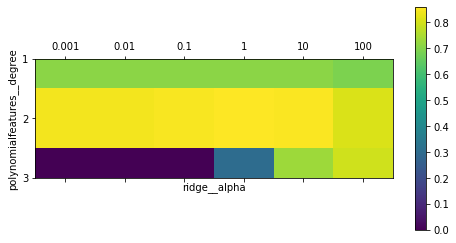

In [43]:
import numpy as np

plt.matshow(grid.cv_results_['mean_test_score'].reshape(3,-1),vmin=0,cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.colorbar()
